# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [9]:

def svd_manual(A, k):
    #  covariance matrix
    covariance_matrix = np.dot(A.T, A) / A.shape[0]
    
    # eigenvalues and eigenvectors of covariance matrix
    eigvals, eigvecs = np.linalg.eigh(covariance_matrix)
    
    
    idx = np.argsort(eigvals)[::-1]
    eigvals = eigvals[idx]
    eigvecs = eigvecs[:, idx]
    
   
    top_k_eigvecs = eigvecs[:, :k]
    A_reduced = np.dot(A, top_k_eigvecs)
    
    return A_reduced, eigvals, eigvecs

## Part 3: Train Logistic Regression and Measure Performance

In [10]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')
    
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [11]:
svd_components = [4,5,6,7,8,10, 15,20]  # Example components to search, you can modify this list

# Store the results
results = []


print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")
    
    # Apply SVD to the training and test sets
    # Call apply_svd_custom() here...
    
    X_train_svd, _, _ = svd_manual(X_train, n_components)
    
    # Perform SVD on the test data using the same number of components
    X_test_svd, _, _ = svd_manual(X_test, n_components)
    
    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)
    results.append({
        'n_components': n_components,
        'accuracy': accuracy,
        'training_time': training_time
    })
    
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")
        
for result in results:
    print(f"Components: {result['n_components']}, Accuracy: {result['accuracy']:.4f}, Time: {result['training_time']:.4f}")


Training models with different levels of SVD preprocessing...
Applying custom SVD with 4 components...


/Users/fanjuling/anaconda3/envs/506lab1/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 4, Accuracy: 0.5331, Training time: 0.2830 seconds
Applying custom SVD with 5 components...


/Users/fanjuling/anaconda3/envs/506lab1/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 5, Accuracy: 0.6537, Training time: 0.2718 seconds
Applying custom SVD with 6 components...


/Users/fanjuling/anaconda3/envs/506lab1/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 6, Accuracy: 0.7246, Training time: 0.3239 seconds
Applying custom SVD with 7 components...


/Users/fanjuling/anaconda3/envs/506lab1/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 7, Accuracy: 0.6114, Training time: 0.3158 seconds
Applying custom SVD with 8 components...


/Users/fanjuling/anaconda3/envs/506lab1/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 8, Accuracy: 0.6495, Training time: 0.3348 seconds
Applying custom SVD with 10 components...


/Users/fanjuling/anaconda3/envs/506lab1/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 10, Accuracy: 0.6997, Training time: 0.3635 seconds
Applying custom SVD with 15 components...


/Users/fanjuling/anaconda3/envs/506lab1/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 15, Accuracy: 0.5939, Training time: 0.4130 seconds
Applying custom SVD with 20 components...


/Users/fanjuling/anaconda3/envs/506lab1/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 20, Accuracy: 0.5476, Training time: 0.5092 seconds
Components: 4, Accuracy: 0.5331, Time: 0.2830
Components: 5, Accuracy: 0.6537, Time: 0.2718
Components: 6, Accuracy: 0.7246, Time: 0.3239
Components: 7, Accuracy: 0.6114, Time: 0.3158
Components: 8, Accuracy: 0.6495, Time: 0.3348
Components: 10, Accuracy: 0.6997, Time: 0.3635
Components: 15, Accuracy: 0.5939, Time: 0.4130
Components: 20, Accuracy: 0.5476, Time: 0.5092


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


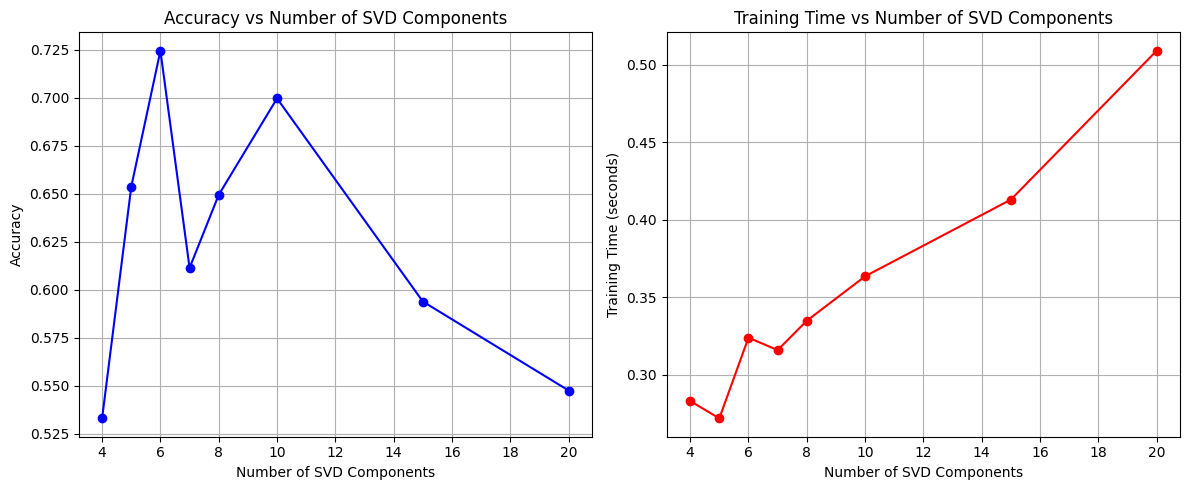

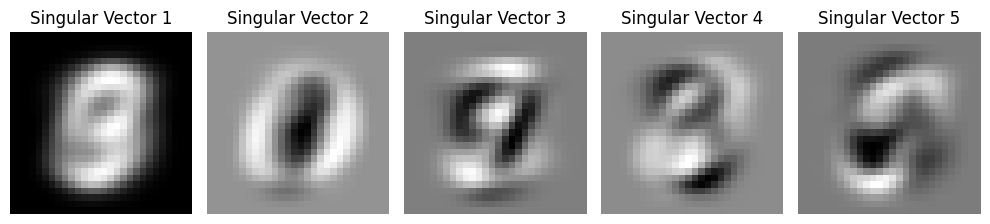

In [12]:
## Your implementation here...
## You may add necessary lines in Part 4 to access data for visualization
# Part 5: Visualize and Analyze the Results


# Extract values from results for plotting
n_components = [result['n_components'] for result in results]
accuracies = [result['accuracy'] for result in results]
training_times = [result['training_time'] for result in results]

# Plot accuracy as a function of the number of SVD components
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(n_components, accuracies, marker='o', label='Accuracy', color='blue')
plt.title("Accuracy vs Number of SVD Components")
plt.xlabel("Number of SVD Components")
plt.ylabel("Accuracy")
plt.grid(True)

# Plot training time as a function of the number of SVD components
plt.subplot(1, 2, 2)
plt.plot(n_components, training_times, marker='o', label='Training Time', color='red')
plt.title("Training Time vs Number of SVD Components")
plt.xlabel("Number of SVD Components")
plt.ylabel("Training Time (seconds)")
plt.grid(True)

plt.tight_layout()
plt.show()

# Visualize top 5 singular vectors reshaped to 28x28 images
_, _, eigvecs = svd_manual(X_train, 5)  # Perform SVD on training data with 5 components

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(eigvecs[:, i].reshape(28, 28), cmap='gray')
    plt.title(f"Singular Vector {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()


## Part 6: Analyze / Conclusion 

YOUR ANSWER: 

Generally, time increases with the svd components.

High number of components likely yields accuracy , as more information is retained, but this will also takes a lot of time or leads to overfitting.

When compnents=6, the accuracy peaks at an accuracy of 0.7246. 6 components provide the best balance between accuracy and time.